<h1><i><center>CS501 K-Nearest Neighbor Graduate Project</center></i></h1>
<h3><i><center>By: Jake McKenzie</center></i></h3>

<p>In this project, we have a total of twelve text files. Five text files are literary works written by author <strong>H. G. Wells</strong>. An additional five text files are literary works written by <strong>Friedrich Nietzsche</strong>. All twelve works were extracted from the website <strong>Project Gutenburg (https://www.gutenberg.org/)</strong>. The remaining two are "unknown" literary works written by each author, respectively. All twelve of the files have been stripped of punctuation and formatted to a CSV file that contains each unique word used by the author and its frequency of appearance.</p>

<p>The goal of this project is to analyze the literary works of two different authors (H.G. Wells and Friedrich Nietzsche) by performing a K-Nearest Neighbor (KNN) analysis on each work. The desired ending result will be to test the application of the KNN algorithm by attempting to classify both of the unknown works to one of the authors.</p>

<p>I plan for my programs to accomplish this by:<p>
<ol><i>
    <li>Cleaning my text data.</li>
    <li>Isolating each unique word and their frequency of occurance in each work.</li>
    <li>Redirect the output of my parsing program to twelve CSV files.</li>
    <li>Load my CSV data to dataframes</li>
    <li>Combine dataframes to one large dataframe</li>
    <li>Pick word dimensions that appear as clustered data points and appear in all columns</li>
    <li>Plot all three two dimensional analysis as scatterplot</li>
    <li>Plot one three dimensional analysis as scatterplot</li>
</i></ol>

<h2><center><i>Transformation of Data From Original Works</i></center></h2>
<p>In order to effectively work with the data in each text file, some transformations had to take place. Before getting any word counts or frequency, I had to first isolate just the English words.</p>
<p>To do so, I called back to our second lab of this semester where we learned regular expressions. I created a regular expression using Python's re module function re.sub() to replace characters that appear in the regex with whitespace. The remaining string was then split on whitespace utilizing a list comprehension. My program then iterated through the list, and searched for unique occurances of a word by checking if they existed in a dictionary "word_count". If they did not, the key and value pair of word:1 were added to the dictionary. If the word existed, I incremented the value at that key. This gave me a dictionary with every unique word in the text string and the corresponding word count.</p>
<p>I then used the built in sorted() method along with the key and reverse parameters and a lambda function to sort the dictionary by values and return a list of tuples. The list of tuples was then cast back to a dictionary. Finally, my program iterated through the dictionary keys and output the key along with the value at the key divided by the total word count to get a frequency of occurance.</p>

<h2><center><i>Read in CSV's and Explore Data</i></center></h2>
<p>In the below python cell, I read in all twelve CSV's so that they may be accessed later in the notebook.</p>
<p>Additionally, I have applied the methods .head(), .info(), .describe(), .shape to my a1_df dataframe. We see the datatypes of each column. We see the top 5 words and frequencies at which they occur. We are shown the max, min, one standard deviation, and quartiles of frequencies in the dataframe.</p>

In [2]:
import pandas as pd
from IPython.core.display import display

#function reads in csv to dataframe and returns dataframe
def csv_to_df(link):
    new_df = pd.read_csv(link)
    
    return new_df

#reading in author 1 and 2 and uknown csv's to dataframes
a1_df = csv_to_df("https://cs.indstate.edu/~cs40126/authors/a1.csv")
a2_df = csv_to_df("https://cs.indstate.edu/~cs40126/authors/a2.csv")
a3_df = csv_to_df("https://cs.indstate.edu/~cs40126/authors/a3.csv")
a4_df = csv_to_df("https://cs.indstate.edu/~cs40126/authors/a4.csv")
a5_df = csv_to_df("https://cs.indstate.edu/~cs40126/authors/a5.csv")

b1_df = csv_to_df("https://cs.indstate.edu/~cs40126/authors/b1.csv")
b2_df = csv_to_df("https://cs.indstate.edu/~cs40126/authors/b2.csv")
b3_df = csv_to_df("https://cs.indstate.edu/~cs40126/authors/b3.csv")
b4_df = csv_to_df("https://cs.indstate.edu/~cs40126/authors/b4.csv")
b5_df = csv_to_df("https://cs.indstate.edu/~cs40126/authors/b5.csv")

ua_df = csv_to_df("https://cs.indstate.edu/~cs40126/authors/ua.csv")
ub_df = csv_to_df("https://cs.indstate.edu/~cs40126/authors/ub.csv")

#display(a1_df.head(60))
#display(b3_df.head(40))
print()

csv_list = [a1_df, a2_df, a3_df, a4_df, a5_df, b1_df, b2_df, b3_df, b4_df, b5_df, ua_df, ub_df]
csv_name = ['a1', 'a2', 'a3', 'a4', 'a5', 'b1', 'b2', 'b3', 'b4', 'b5', 'ua', 'ub']
    
##function takes a word argument. Checks if word is in each df. Prints average frequency and average ranking of the word for each author.
def explore_word(word):
    a_avg = 0
    b_avg = 0
    a_rank = 0
    b_rank = 0
    print(f'The word being explored is: {word}')
    print()
    for i in range(len(csv_list)):
        print(csv_name[i])
        current = csv_list[i].loc[csv_list[i]['Word'] == word]
        #https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.any.html checks if word exists at current row
        if(current['Word'].any()):
            #get subset of index i.e just integer https://stackoverflow.com/questions/43193880/how-to-get-row-number-in-dataframe-in-pandas
            id = current.index[0]
            print(id)
            print('____')
            #check current index is in author a 
            if(i < 5):
                a_rank += id
                a_avg += current['Count'].sum()
            #check current index is in author b
            elif(i > 4 and i < 10):
                b_rank += id
                b_avg += current['Count'].sum()
        else:
            print(f'{word} not in {csv_name[i]}')
            break
        
    print('a')
    print(a_avg / 5)
    print(a_rank / 5)
    print()
    print('b')
    print(b_avg / 5)
    print(b_rank / 5)

explore_word('not')


The word being explored is: not

a1
38
____
a2
31
____
a3
26
____
a4
24
____
a5
33
____
b1
12
____
b2
14
____
b3
13
____
b4
21
____
b5
15
____
ua
33
____
ub
15
____
a
0.0037814763897536
30.4

b
0.006703586514668319
15.0


In [3]:
explore_word('there')

The word being explored is: there

a1
31
____
a2
26
____
a3
50
____
a4
40
____
a5
34
____
b1
33
____
b2
43
____
b3
40
____
b4
87
____
b5
67
____
ua
25
____
ub
60
____
a
0.0031957329035135597
36.2

b
0.0025493236812025796
54.0


In [4]:
explore_word('again')

The word being explored is: again

a1
55
____
a2
69
____
a3
59
____
a4
59
____
a5
80
____
b1
189
____
b2
119
____
b3
579
____
b4
120
____
b5
122
____
ua
101
____
ub
316
____
a
0.00195321185596964
64.4

b
0.00072704324874482
225.8


<h2><center><i>Dimensions of Analysis</i></center></h2>

<h4><center><strong>What are Dimensions of Analysis?</strong></center></h4>
<p>Dimensions of Analysis are refering to the metrics by which we will compare known literary works to unknown literary works and infer which author most likely wrote which unknown work.</p>

<h4><center><strong>Selection of Dimensions</strong></center></h4>
<p>In order to decide upon my three dimensions of analysis, I first printed a1_df using the method .head(60). This showed the 60 highest frequency words in a1. I did the same for b1_df and I noted that the words 'not' and 'there' seemed to be spread by about 10-15 ranks. To further inspect my data, I created a for loop that iterated through each literary work, conditionally checking if the word exists. If word, then the loop advances to print the work name, rank of the word, and calculate the final average frequency of occurance and ranking in all literary works by author. This process was repeated for each word.</p>

<h5><strong><i>'not' :</strong></i></h5>
<h5><li><strong>H.G. Wells: average ranking of 30.4</strong> and <strong>average frequency of 0.0037814763897536.</strong></li></h5>
<h5><li><strong>Freidrich Neitzsche: average ranking of 15.0</strong> and <strong>average frequency of appearance is 0.006703586514668319.</strong> </li></h5>

<h5><strong><i>'there' :</strong></i></h5>
<h5><li><strong>H.G. Wells: average ranking of 36.2</strong> and <strong>average frequency of 0.0031957329035135597.</strong></li></h5>
<h5><li><strong>Freidrich Neitzsche: average ranking of 54.0</strong> and <strong>average frequency of appearance is 0.0025493236812025796.</strong> </li></h5>

<h5><strong><i>'again' :</strong></i></h5>
<h5><li><strong>H.G. Wells: average ranking of 64.4</strong> and <strong>average frequency of 0.00195321185596964.</strong></li></h5>
<h5><li><strong>Freidrich Neitzsche: average ranking of 225.8</strong> and <strong>average frequency of appearance is 0.00072704324874482.</strong> </li></h5>

<p>Each of these dimensions was found by comparing average frequency of occurances between the two authors. Given that the averages are in different ranges across all works, this implies that there is a cluster of data points. We will be able to use this in our KNN algorithm to calculate distance between neighbors and hopefully have enough difference to make an accurate conclusion. </p>

<h4><center><strong>Significance of Dimensions</strong></center></h4>
<p>The selected dimensions of analysis being based on average word usage ranking and frequency of usage reflect each author's writing style. These differences create patterns of data point clusters that will allow our KNN algorithm to be spread far enough to make a meaningful comparison of neighbors. </p>
<p>I chose to apply the min-max normalization method to the data. My rationale is that while each value has already been computed as a frequency of occurance, not all decimal places are in line in the thousandths place, some are to the ten thousands place (see average for 'again'). By normalizing using the min-max method, we set the minimum value to zero and the maximum value to one while maintaining proportionality of the data. With our normalized data, we will be able to calculate distance between neighbors on an even scale and not get skewed results for higher or lower frequencies. This seems to provide a good basis to analyze data points in clusters and distances on a plot and in KNN analysis.</p>

In [5]:
#referencing KNN video part 3 for merging frames https://cs.indstate.edu/~lmay1/courses/#/courses/cs401/articles/lec10

#enumerate https://www.geeksforgeeks.org/enumerate-in-python/
#iterate through csv list and keep count of iterations w/ enumerate
for i, df in enumerate(csv_list):
    #check first iteration
    if(i == 0):
        #rename count column in dataframe - slightly altered your usage in part 4 video
        df.rename(columns={'Count': f'{csv_name[i]}_freq'}, inplace=True)
        csv_list[i + 1].rename(columns={'Count': f'{csv_name[i + 1]}_freq'}, inplace=True)
        #merge a1 and a2 works on word - again slightly altered your usage in part 4 video
        combine_df = df.merge(csv_list[i + 1], how='inner', on='Word')
    #check is at least third iteration
    elif(i > 1 ):
        #rename count column in dataframe - slightly altered your usage in part 4 video
        df.rename(columns={'Count': f'{csv_name[i]}_freq'}, inplace=True)
        #merge next df on word
        combine_df = combine_df.merge(df, how='inner', on='Word')

#get the first 100 rows
combine_df = combine_df.head(100)

#min-max normalization method https://www.geeksforgeeks.org/data-normalization-with-pandas/
#iterate through columns in combined dataframe
for col in combine_df.columns:
    #check current column type is float and not word str
    if(combine_df[col].dtype == 'float64'):
        #take current col vals - min all over max - min of column. minimum becomes 0 and max becomes one. Allows for true distance to be calculated on a normalized scale on a graph.
        combine_df[col] = (combine_df[col] - combine_df[col].min()) / (combine_df[col].max() - combine_df[col].min())
    
#display new combined df
display(combine_df)

#verify again chosen words in all columns and index of word
there_df = combine_df.loc[combine_df['Word'] == 'there']
not_df = combine_df.loc[combine_df['Word'] == 'not']
again_df = combine_df.loc[combine_df['Word'] == 'again']

display(there_df)
display(not_df)
display(again_df)

#optional args = https://www.geeksforgeeks.org/how-to-pass-optional-parameters-to-a-function-in-python/
#function creates series from df using iloc and index. Take optional third argument for slice range, i.e. 1:6
#returns a pandas series
def get_series(df, slice, end = 0, auth_b = 0):
    #check if no third arg 
    if(end == 0 and auth_b == 0):
        #referenced: https://stackoverflow.com/questions/30673684/pandas-dataframe-first-x-columns
        subset = df.iloc[:, slice]
    #check if arg for author b
    elif (end == 0 and auth_b != 0):
        subset = df.iloc[:, auth_b:11]
    #else take slice
    elif(end != 0 and auth_b == 0):
        subset = df.iloc[:, slice:end]
        
    return subset


,Word,a1_freq,a2_freq,a3_freq,a4_freq,a5_freq,b1_freq,b2_freq,b3_freq,b4_freq,b5_freq,ua_freq,ub_freq
0,the,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,and,0.608374,0.539982,0.535987,0.671552,0.695847,0.688729,0.405591,0.316765,0.368953,0.692084,0.604789,0.358675
2,a,0.395320,0.353691,0.339635,0.366392,0.423190,0.333599,0.307497,0.327811,0.211302,0.359721,0.359402,0.354301
3,of,0.387007,0.508787,0.469983,0.504919,0.530338,0.728602,0.706480,0.738856,0.671944,0.778231,0.655316,0.777130
4,to,0.286022,0.297452,0.301824,0.301947,0.324379,0.498671,0.371283,0.376331,0.327836,0.555491,0.343366,0.410539
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,turned,0.000616,0.008787,0.023881,0.013451,0.007874,0.000000,0.002795,0.001972,0.000660,0.001164,0.004833,0.000625
96,feet,0.000616,0.007030,0.008955,0.009637,0.008646,0.000000,0.000000,0.000394,0.000220,0.000776,0.003735,0.000625
97,himself,0.000000,0.001757,0.004312,0.014254,0.015748,0.034556,0.028717,0.012623,0.024846,0.037059,0.009446,0.021662
98,began,0.000000,0.017135,0.024876,0.014053,0.009264,0.000532,0.000254,0.003945,0.001319,0.001358,0.009446,0.000833


,Word,a1_freq,a2_freq,a3_freq,a4_freq,a5_freq,b1_freq,b2_freq,b3_freq,b4_freq,b5_freq,ua_freq,ub_freq
29,there,0.036638,0.052724,0.037811,0.042361,0.044928,0.058214,0.039898,0.039842,0.015611,0.035894,0.058656,0.028119


,Word,a1_freq,a2_freq,a3_freq,a4_freq,a5_freq,b1_freq,b2_freq,b3_freq,b4_freq,b5_freq,ua_freq,ub_freq
35,not,0.03202,0.049649,0.063018,0.06585,0.046163,0.124668,0.086404,0.095858,0.058487,0.139309,0.046573,0.108102


,Word,a1_freq,a2_freq,a3_freq,a4_freq,a5_freq,b1_freq,b2_freq,b3_freq,b4_freq,b5_freq,ua_freq,ub_freq
51,again,0.019089,0.025923,0.029519,0.028107,0.020997,0.009569,0.013215,0.001972,0.010334,0.017656,0.01384,0.004999


<h2><center><i>Construct Combined Dataframe</i></center></h2>

<p>In the above code block, I joined all of my dataframes into one combined dataframe. Each of the 12 columns represents the five works from each author and two unknown works. This merging was accomplished by enumerating the list of dataframes and iterating through the list while naming each column appropriately using pandas' .rename() method and merging dataframes on the 'Word' column.</p>

<p>The next step was to save only the first 100 lines of the combined dataframe using the .head(100) method. </p>

<p>Finally, to visually verify that each column contained the specified word, I used the pandas' .loc method to subset of the larger frame and displayed the specified word row. </p>

<h4><center><strong>Get Series Data for 'there'</strong></center></h4>
<p><center><i>Getting series by author and unknown work to map on scatterplot.</i></center></p>

In [6]:
#get data in series for 'there'
there_df_ua = get_series(there_df, 11)
display(there_df_ua)
there_df_ub = get_series(there_df, 12)
display(there_df_ub)
there_auth_a = get_series(there_df, 1, 6)
display(there_auth_a)
there_auth_b = get_series(there_df, 0, 0, 6)
display(there_auth_b)


29    0.058656
Name: ua_freq, dtype: float64

29    0.028119
Name: ub_freq, dtype: float64

,a1_freq,a2_freq,a3_freq,a4_freq,a5_freq
29,0.036638,0.052724,0.037811,0.042361,0.044928


,b1_freq,b2_freq,b3_freq,b4_freq,b5_freq
29,0.058214,0.039898,0.039842,0.015611,0.035894


<h4><center><strong>Get Series Data for 'not'</strong></center></h4>
<p><center><i>Getting series by author and unknown work to map on scatterplot.</i></center></p>

In [7]:
not_df_ua = get_series(not_df, 11)
not_df_ub = get_series(not_df, 12)
not_auth_a = get_series(not_df, 1, 6)
not_auth_b = get_series(not_df, 0, 0, 6)
display(not_df_ua)
display(not_df_ub)
display(not_auth_a)
display(not_auth_b)

35    0.046573
Name: ua_freq, dtype: float64

35    0.108102
Name: ub_freq, dtype: float64

,a1_freq,a2_freq,a3_freq,a4_freq,a5_freq
35,0.03202,0.049649,0.063018,0.06585,0.046163


,b1_freq,b2_freq,b3_freq,b4_freq,b5_freq
35,0.124668,0.086404,0.095858,0.058487,0.139309


<h4><center><strong>Get Series Data for 'again'</strong></center></h4>
<p><center><i>Getting series by author and unknown work to map on scatterplot.</i></center></p>

In [8]:
again_df_ua = get_series(again_df, 11)
again_df_ub = get_series(again_df, 12)
again_auth_a = get_series(again_df, 1, 6)
again_auth_b =get_series(again_df, 0, 0, 6)
display(again_df_ua)
display(again_df_ub)
display(again_auth_a)
display(again_auth_b)

51    0.01384
Name: ua_freq, dtype: float64

51    0.004999
Name: ub_freq, dtype: float64

,a1_freq,a2_freq,a3_freq,a4_freq,a5_freq
51,0.019089,0.025923,0.029519,0.028107,0.020997


,b1_freq,b2_freq,b3_freq,b4_freq,b5_freq
51,0.009569,0.013215,0.001972,0.010334,0.017656


<h2><center><i> 2D K-Nearest Neighbor Functions</i></center></h2>

<p>Below, I will define a two dimensional distance calculation function for implementing our KNN algorithm with our 2D scatterplots.</p>

<p><center><strong>The formula to calculate Euclidean distance between two points in <u>two</u> dimensions is: </center></strong></p>

$$
    d() = \sqrt{\Delta{x^2} + \Delta{y^2}}
$$

In [17]:
import numpy as np
from operator import itemgetter
##Referenced video 3 for distance formula https://cs.indstate.edu/~lmay1/courses/#/courses/cs401/articles/lec10
##function takes two sets of x and y coordinates and calculates the euclidean distance based off of formula above. Returns a float.
def two_d_distance(x, ux, y, uy):
    distance = np.sqrt((ux - x)**2 + (uy - y)**2)
    return distance

##function callcs two_d_distance to get euclidean distance between neighbors, appends to new neighbor list and returns a list
def add_neighbor(x, ux, y, uy, author):
    new_neighbor = []
    distance = two_d_distance(x, ux, y, uy)
    new_neighbor = [distance, x, y, author]
    
    return new_neighbor

#function takes uknown xy parameters and concatenated series of xy from authors a and b
##loops 10 times calling functions to get euclidean distance of each point for author a and b, appends results and author name to list of lists
#sorts the list after loop completes on sublist index 0. Returns list of lists
def create_distance_list(ux, uy, joint_a, joint_b):
    neighbors = []
    #loop 10 times
    for i in range(10):
        #check i < 5 still auth a
        if(i < 5):
            #get values at index in concatenates series
            x = joint_a.iloc[0][i]
            y = joint_a.iloc[1][i]
            #append list to list
            neighbors.append(add_neighbor(x, ux, y, uy, 'Wells'))
        #check i > 5 for auth b
        else:
            #normalize i so index not out of bounds
            i = i - 5
            #get values at index in concatenates series
            x = joint_b.iloc[0][i]
            y = joint_b.iloc[1][i]
            #append list to list
            neighbors.append(add_neighbor(x, ux, y, uy, 'Nietzsche'))

    #sort list of lists by sublist index 0
    #found itemgetter https://stackoverflow.com/questions/4174941/how-to-sort-a-list-of-lists-by-a-specific-index-of-the-inner-list
    neighbors = sorted(neighbors, key=itemgetter(0))

    return neighbors

##function that takes three parameters: list of lists of euclidean distance of neighbors and k value and name_location. name_location can be 3 if 2d and 4 if 3d analyses. Loops through list of lists k times and gets count of first k shortest distances from unknown point respective to each author. 
##compares count and decides an author. Returns a string.
def run_knn(neighbors, k, name_location):
    count_wells = 0
    count_neitzsche = 0
    pick_author = None
    #loop through lists of lists up to k
    for i in range(k):
        #get author name at index i
        author_name = neighbors[i][name_location]
        #check which author and increment count
        if(author_name == 'Wells'):
            count_wells += 1
        elif(author_name == 'Nietzsche'):
            count_neitzsche += 1
    #compare counts and pick largest count
    if(count_wells > count_neitzsche):
        pick_author = 'H.G. Wells'
    elif(count_neitzsche > count_wells):
        pick_author = 'Friedrich Nietzsche'
    
    return pick_author

<h2><center><i>Plotting Two Dimensions</i></center></h2>

<p>The below three scatter plots will display a two-dimensional plot of the three possible combinations.</p> 

<h4><center><strong>Plotting Dimensions: 'there' and 'not': </strong></center></h4>

'With a K of 5, the KNN Algorithm determined that the Unknown A author is H.G. Wells'

'With a K of 7, the KNN Algorithm determined that the Unknown A author is H.G. Wells'

'With a K of 5, the KNN Algorithm determined that the Unknown B author is Friedrich Nietzsche'

'With a K of 7, the KNN Algorithm determined that the Unknown B author is Friedrich Nietzsche'

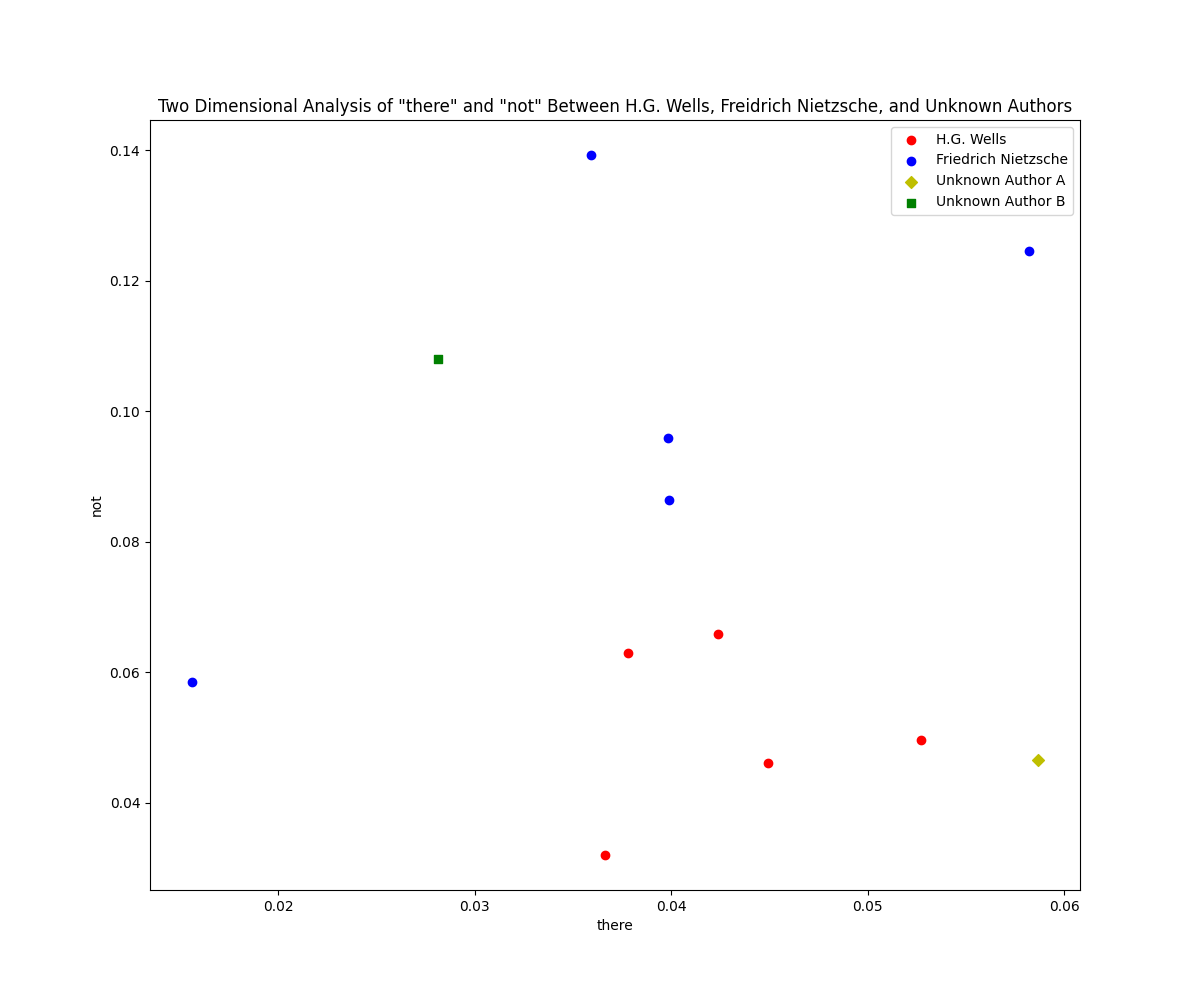

In [16]:
from matplotlib import pyplot as plt

plt.figure( figsize=(12, 10))
#getting xy for author a
x = there_auth_a
y = not_auth_a
#getting xy for author b
x_2 = there_auth_b
y_2 = not_auth_b
#getting xy for unknown author a
xu_1 = there_df_ua
yu_1 = not_df_ua
#getting xy for unknown author b
xu_2 = there_df_ub
yu_2 = not_df_ub

#concatenate x and y df's
joint_a = pd.concat([x, y])
joint_b = pd.concat([x_2, y_2])
#get xy vals for unknown author points
uax = xu_1.values[0]
uay = yu_1.values[0]
ubx = xu_2.values[0]
uby = yu_2.values[0]

#initialize lists
ua_neighbors = []
ub_neighbors = []

#get euclidean distances in list of lists
ua_neighbors = create_distance_list(uax, uay, joint_a, joint_b)
ub_neighbors = create_distance_list(ubx, uby, joint_a, joint_b)

#display sorted list of lists with euclidean distances 
#display(ua_neighbors)

#display(ub_neighbors)
    
ua_reveal = run_knn(ua_neighbors, 5, 3)
display(f'With a K of 5, the KNN Algorithm determined that the Unknown A author is {ua_reveal}')
display()
ua_reveal = run_knn(ua_neighbors, 7, 3)
display(f'With a K of 7, the KNN Algorithm determined that the Unknown A author is {ua_reveal}')
display()
ub_reveal = run_knn(ub_neighbors, 5, 3)
display(f'With a K of 5, the KNN Algorithm determined that the Unknown B author is {ub_reveal}')
display()
ub_reveal = run_knn(ub_neighbors, 7, 3)
display(f'With a K of 7, the KNN Algorithm determined that the Unknown B author is {ub_reveal}')
display()
#referencing class video part four where you graph your 2d scatter plot to graph this, with a slightly different approach - follow for all three 2d plots
#https://cs.indstate.edu/~lmay1/courses/#/courses/cs401/articles/lec10
plt.scatter(x, y, c='r', label='H.G. Wells')
plt.scatter(x_2, y_2, c='b', label='Friedrich Nietzsche')
plt.scatter(xu_1, yu_1, c='y', label='Unknown Author A', marker='D')
plt.scatter(xu_2, yu_2, c='g', label='Unknown Author B', marker='s')

##add style to graph 
plt.title('Two Dimensional Analysis of "there" and "not" Between H.G. Wells, Freidrich Nietzsche, and Unknown Authors')
plt.legend()
plt.xlabel('there')
plt.ylabel('not')
plt.show()




<h4><center><strong>Plotting Dimensions: 'there' and 'again': </strong></center></h4>

'With a K of 5, the KNN Algorithm determined that the Unknown A author is H.G. Wells'

'With a K of 7, the KNN Algorithm determined that the Unknown A author is H.G. Wells'

'With a K of 5, the KNN Algorithm determined that the Unknown B author is Friedrich Nietzsche'

'With a K of 7, the KNN Algorithm determined that the Unknown B author is Friedrich Nietzsche'

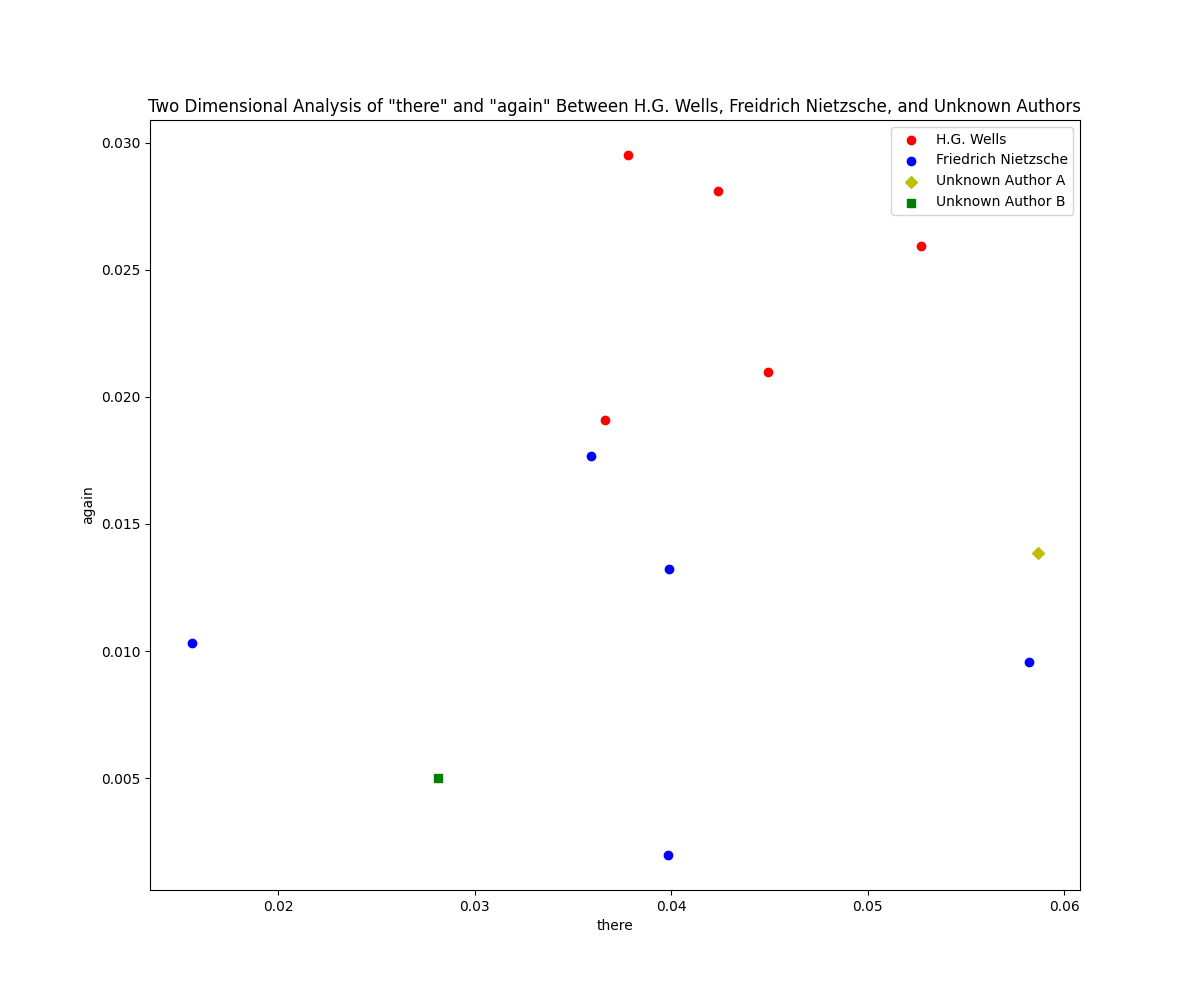

In [11]:
plt.figure(figsize=(12, 10))

x = there_auth_a
y = again_auth_a

x_2 = there_auth_b
y_2 = again_auth_b

xu_1 = there_df_ua
yu_1 = again_df_ua

xu_2 =there_df_ub
yu_2 = again_df_ub

#concatenate x and y df's
joint_a = pd.concat([x, y])
joint_b = pd.concat([x_2, y_2])
#get xy vals for unknown author points
uax = xu_1.values[0]
uay = yu_1.values[0]
ubx = xu_2.values[0]
uby = yu_2.values[0]

#initialize lists
ua_neighbors = []
ub_neighbors = []

#get euclidean distances in list of lists
ua_neighbors = create_distance_list(uax, uay, joint_a, joint_b)
ub_neighbors = create_distance_list(ubx, uby, joint_a, joint_b)

#display sorted list of lists with euclidean distances 
#display(ua_neighbors)

#display(ub_neighbors)
    
ua_reveal = run_knn(ua_neighbors, 5, 3)
display(f'With a K of 5, the KNN Algorithm determined that the Unknown A author is {ua_reveal}')
display()
ua_reveal = run_knn(ua_neighbors, 7, 3)
display(f'With a K of 7, the KNN Algorithm determined that the Unknown A author is {ua_reveal}')
display()
ub_reveal = run_knn(ub_neighbors, 5, 3)
display(f'With a K of 5, the KNN Algorithm determined that the Unknown B author is {ub_reveal}')
display()
ub_reveal = run_knn(ub_neighbors, 7, 3)
display(f'With a K of 7, the KNN Algorithm determined that the Unknown B author is {ub_reveal}')
display()

plt.scatter(x, y, c='r', label='H.G. Wells')
plt.scatter(x_2, y_2, c='b', label='Friedrich Nietzsche')
plt.scatter(xu_1, yu_1, c='y', label='Unknown Author A', marker='D')
plt.scatter(xu_2, yu_2, c='g', label='Unknown Author B', marker='s')

plt.legend()
plt.title('Two Dimensional Analysis of "there" and "again" Between H.G. Wells, Freidrich Nietzsche, and Unknown Authors')
plt.xlabel('there')
plt.ylabel('again')

plt.show()

<h4><center><strong>Plotting Dimensions: 'not' and 'again': </strong></center></h4>

'With a K of 5, the KNN Algorithm determined that the Unknown A author is H.G. Wells'

'With a K of 7, the KNN Algorithm determined that the Unknown A author is H.G. Wells'

'With a K of 5, the KNN Algorithm determined that the Unknown B author is Friedrich Nietzsche'

'With a K of 7, the KNN Algorithm determined that the Unknown B author is Friedrich Nietzsche'

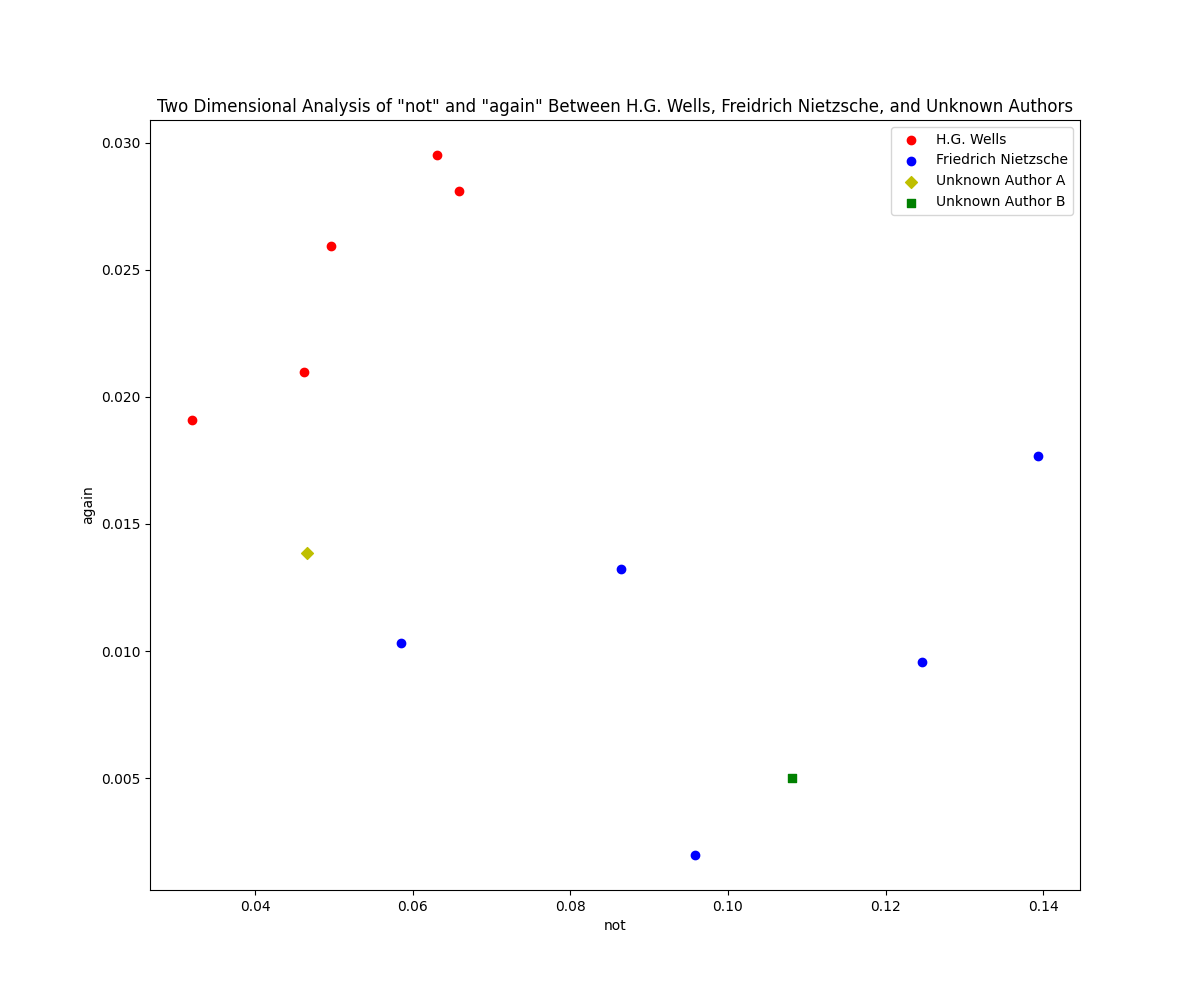

In [12]:
plt.figure( figsize=(12, 10))

x = not_auth_a
y = again_auth_a

x_2 = not_auth_b
y_2 = again_auth_b

xu_1 = not_df_ua
yu_1 = again_df_ua

xu_2 = not_df_ub
yu_2 = again_df_ub

#concatenate x and y df's
joint_a = pd.concat([x, y])
joint_b = pd.concat([x_2, y_2])
#get xy vals for unknown author points
uax = xu_1.values[0]
uay = yu_1.values[0]
ubx = xu_2.values[0]
uby = yu_2.values[0]

#initialize lists
ua_neighbors = []
ub_neighbors = []

#get euclidean distances in list of lists
ua_neighbors = create_distance_list(uax, uay, joint_a, joint_b)
ub_neighbors = create_distance_list(ubx, uby, joint_a, joint_b)

#display sorted list of lists with euclidean distances 
#display(ua_neighbors)

#display(ub_neighbors)
    
ua_reveal = run_knn(ua_neighbors, 5, 3)
display(f'With a K of 5, the KNN Algorithm determined that the Unknown A author is {ua_reveal}')
display()
ua_reveal = run_knn(ua_neighbors, 7, 3)
display(f'With a K of 7, the KNN Algorithm determined that the Unknown A author is {ua_reveal}')
display()
ub_reveal = run_knn(ub_neighbors, 5, 3)
display(f'With a K of 5, the KNN Algorithm determined that the Unknown B author is {ub_reveal}')
display()
ub_reveal = run_knn(ub_neighbors, 7, 3)
display(f'With a K of 7, the KNN Algorithm determined that the Unknown B author is {ub_reveal}')
display()

#display(xu_1.values)
plt.scatter(x, y, c='r', label='H.G. Wells')
plt.scatter(x_2, y_2, c='b', label='Friedrich Nietzsche')
plt.scatter(xu_1, yu_1, c='y', label='Unknown Author A', marker='D')
plt.scatter(xu_2, yu_2, c='g', label='Unknown Author B', marker='s')
    
plt.title('Two Dimensional Analysis of "not" and "again" Between H.G. Wells, Freidrich Nietzsche, and Unknown Authors')
plt.legend()
plt.xlabel('not')
plt.ylabel('again')

plt.show()

<h2><center><i>Plotting Three Dimensions</i></center></h2>

<p>The below scatter plot displays a three-dimensional plot of the three dimensions of analysis.</p> 


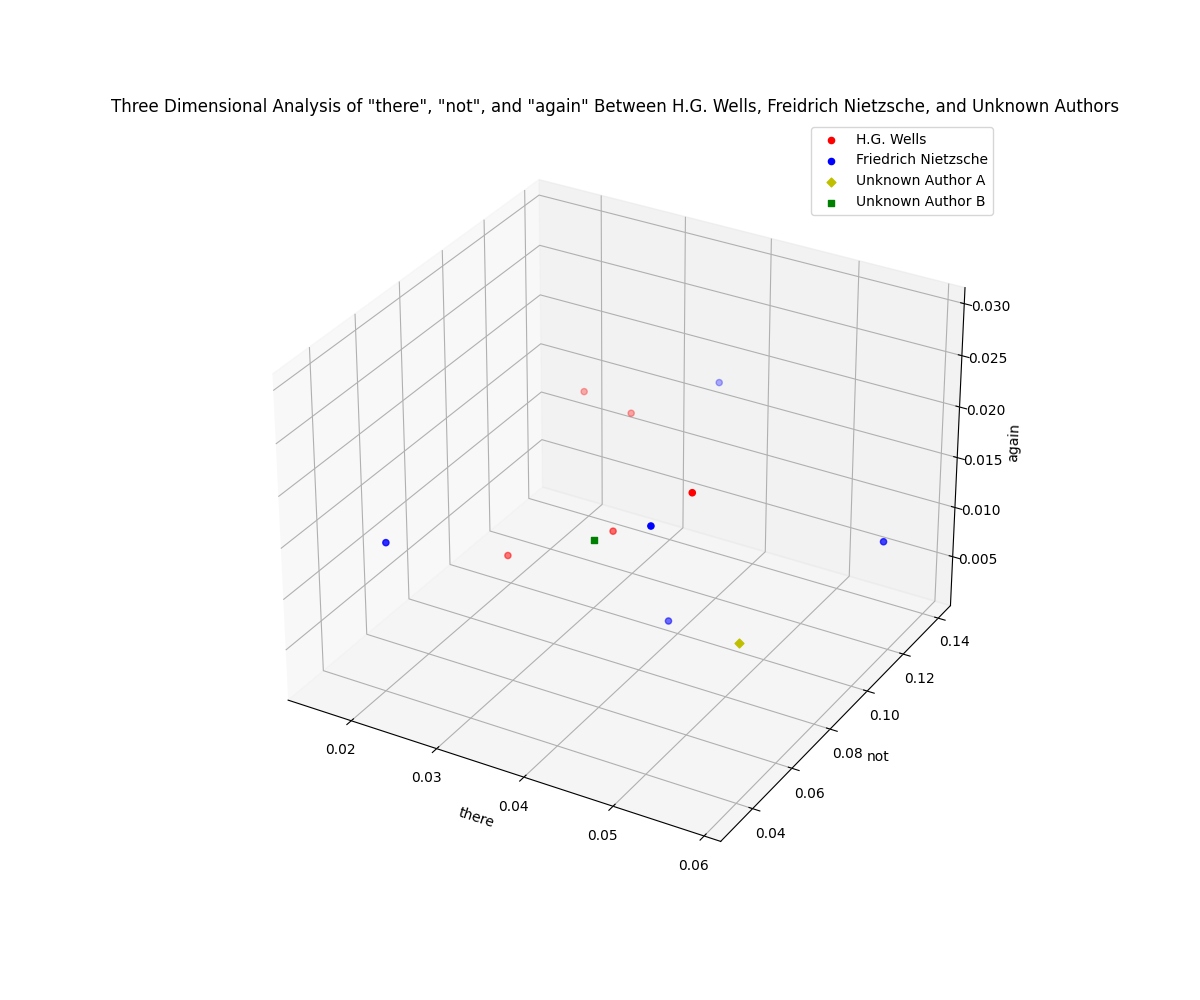

In [19]:
%matplotlib widget

fig = plt.figure(figsize=(12,10))
#referencing https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html\ for ax,add_subplot and projection
ax = fig.add_subplot(projection='3d')

x = there_auth_a
y = not_auth_a
z = again_auth_a

x_2 = there_auth_b
y_2 = not_auth_b
z_2 = again_auth_b

xu_1 = there_df_ua
yu_1 = not_df_ua
zu_1 = again_df_ua

xu_2 = there_df_ub
yu_2 = not_df_ub
zu_2 = again_df_ub

#referencing https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html\ for ax.scatter
ax.scatter(x, y, z, c='r', label='H.G. Wells')
ax.scatter(x_2, y_2, z_2, c='b', label='Friedrich Nietzsche')
#https://matplotlib.org/stable/api/markers_api.html markers
ax.scatter(xu_1, yu_1, zu_1, c='y', label='Unknown Author A', marker='D')
ax.scatter(xu_2, yu_2, zu_2, c='g', label='Unknown Author B', marker='s')

plt.legend()
plt.title('Three Dimensional Analysis of "there", "not", and "again" Between H.G. Wells, Freidrich Nietzsche, and Unknown Authors')
#referencing https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html\ for ax.set_label
ax.set_xlabel('there')
ax.set_ylabel('not')
ax.set_zlabel('again')
plt.show()

<h2><center><i>3D K-Nearest Neighbor Functions</i></center></h2>

<p><center><strong>The formula to calculate Euclidean distance between two points in <u>three</u> dimensions is: </center></strong></p>

$$
    d() = \sqrt{\Delta{x^2} + \Delta{y^2} + \Delta{z^2}}
$$

<p>I picked this formula after doing some research (<a href='https://byjus.com/maths/distance-between-two-points-3d/'>here is a source that I used</a>). Using this formula makes sense because the underlying formula for euclidean distance has not changed. It can still be calculated by utilizing the Pythagorean Theorem, just in a higher dimension by adding the additional z-axis. 

In [14]:
##Referencing above euclidean distance formula and my 2d distance function
##function takes two sets of x y and z coordinates and calculates the euclidean distance based off of formula above. Returns a float.
def three_d_distance(x, ux, y, uy, z, uz):
    distance = np.sqrt((ux - x)**2 + (uy - y)**2 + (uz - z)**2)
    return distance

##function callcs two_d_distance to get euclidean distance between neighbors, appends to new neighbor list and returns a list
def add_3d_neighbor(x, ux, y, uy, z, uz, author):
    new_neighbor = []
    distance = three_d_distance(x, ux, y, uy, z, uz)
    new_neighbor = [distance, x, y, z, author]
    
    return new_neighbor

#function takes uknown xyz parameters and concatenated series of xyz from authors a and b
##loops 10 times calling functions to get euclidean distance of each point for author a and b, appends results and author name to list of lists
#sorts the list after loop completes on sublist index 0. Returns list of lists
def create_3d_distance_list(ux, uy, uz, joint_a, joint_b):
    neighbors = []
    #loop 10 times
    for i in range(10):
        #check i < 5 still auth a
        if(i < 5):
            #get values at index in concatenates series
            x = joint_a.iloc[0][i]
            y = joint_a.iloc[1][i]
            z = joint_a.iloc[2][i]
            #append list to list
            neighbors.append(add_3d_neighbor(x, ux, y, uy, z, uz, 'Wells'))
        #check i > 5 for auth b
        else:
            #normalize i so index not out of bounds
            i = i - 5
            #get values at index in concatenates series
            x = joint_b.iloc[0][i]
            y = joint_b.iloc[1][i]
            z = joint_b.iloc[2][i]
            #append list to list
            neighbors.append(add_3d_neighbor(x, ux, y, uy, z, uz, 'Nietzsche'))

    #sort list of lists by sublist index 0
    #found itemgetter https://stackoverflow.com/questions/4174941/how-to-sort-a-list-of-lists-by-a-specific-index-of-the-inner-list
    neighbors = sorted(neighbors, key=itemgetter(0))

    return neighbors


<h2><center><i>3D KNN Analysis and Scatterplot with Line Plots</i></center></h2>
<p><center><strong>Analyzing only one unknown work: Unknown Author A</strong></center></p>

'With a K of 5, the KNN Algorithm determined that the Unknown A author is H.G. Wells'

'With a K of 7, the KNN Algorithm determined that the Unknown A author is H.G. Wells'

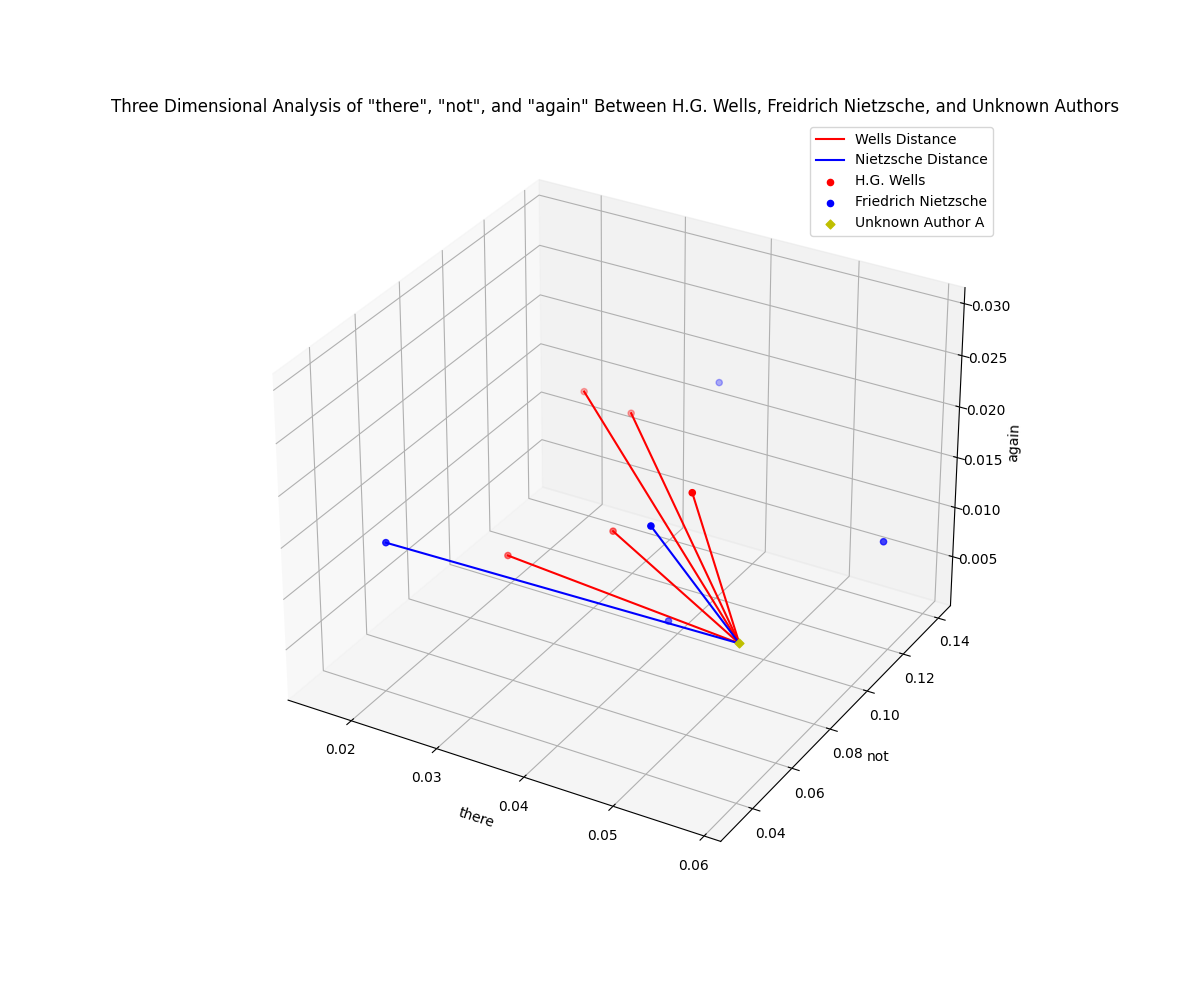

In [20]:
%matplotlib widget

fig = plt.figure(figsize=(12,10))
#referencing https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html\ for ax,add_subplot and projection
ax = fig.add_subplot(projection='3d')

#referencing https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html\ for ax.scatter
ax.scatter(x, y, z, c='r', label='H.G. Wells')
ax.scatter(x_2, y_2, z_2, c='b', label='Friedrich Nietzsche')
#https://matplotlib.org/stable/api/markers_api.html markers
ax.scatter(xu_1, yu_1, zu_1, c='y', label='Unknown Author A', marker='D')

joint_a = pd.concat([x, y, z])
joint_b = pd.concat([x_2, y_2, z_2])

#get coords of unknown point
uax = xu_1.values[0]
uay = yu_1.values[0]
uaz = zu_1.values[0]

#initialize empty list
ua_neighbors = []

#get list of lists for all neighbor distances and author name
ua_neighbors = create_3d_distance_list(uax, uay, uaz, joint_a, joint_b)

#display(ua_neighbors)

#run knn analysis for 5 and 7 and display results
ua_reveal = run_knn(ua_neighbors, 5, 4)
display(f'With a K of 5, the KNN Algorithm determined that the Unknown A author is {ua_reveal}')
display()
ua_reveal = run_knn(ua_neighbors, 7, 4)
display(f'With a K of 7, the KNN Algorithm determined that the Unknown A author is {ua_reveal}')
display()

hg_count = 0
n_count = 0
#referenced your part 3 video for plotting lines on scatterplot https://cs.indstate.edu/~lmay1/courses/#/courses/cs401/articles/lec10
#loop through first k = 7
for i in range(7):
    #reset label
    label = ''
    #get z y z coordinates for nearest k neighbors
    x1 = [uax, ua_neighbors[i][1]]
    y1 = [uay, ua_neighbors[i][2]]
    z1 = [uaz, ua_neighbors[i][3]]
    #get author name
    auth = ua_neighbors[i][4]
    #check who is current auth and assing color val
    if(auth == 'Wells'):
        color = 'r'
        #increment count 
        hg_count += 1
        #check first occuracne and set label
        if(hg_count == 1):
            label = 'Wells Distance'
    else:
        #increment count
        n_count += 1
        color = 'b'
        #check first occuracne and set label
        if(n_count == 1):
            label = 'Nietzsche Distance'
    #plot colored line to each negihbor from unknown point
    plt.plot(x1, y1, z1, c=color, label=label)

plt.legend()
plt.title('Three Dimensional Analysis of "there", "not", and "again" Between H.G. Wells, Freidrich Nietzsche, and Unknown Authors')
#referencing https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html\ for ax.set_label
ax.set_xlabel('there')
ax.set_ylabel('not')
ax.set_zlabel('again')
plt.show()

<h2><center><i>Applying the KNN Analysis</i></center></h2>

<p>Along side each of the graphs, I also implemented the KNN algorithm. I separated the word frequencies by authors into individual series. I then took these series and then concatenated both words by author to seperate dataframes 'joint_a' and 'joint_b', displaying each authors work in a 2x5 dataframe. </p>

<p>Next, I passed each joint dataframe along with the x and y coordinates for my unknown data points to a function. This main function utilizes two smaller helper functions to calculate the 2D euclidean distance formula between neighbors and append that value to a list of lists for each point in the dataframe. Once the loop through the dataframes for both authors completes, my function sorts the returned list of lists from shortest to longest euclidean distance.</p>

<p>Finally, I pass my sorted list of lists and k-value into a function. This function sums the occurance of each authors name up to k given neighbors and makes a decision based on majority occurances of an authors name. This returns the authors name as a string and it is displayed in output for each value of k and for each unknown work.</p>

<h2><center><i>KNN Analyses Results</i></center></h2>

<p>In all cases, the KNN Analysis calculated the correct author. It seems that this is a direct result of picking nicely clustered data points from the top 100 most frequent words used by the authors. Had I picked dimensions with less clustering, I am certain that the results could have been more varied. Regardless, my implementation of the K-Nearest Neighbor algorithm was successful in identifying like data points and accurately  attributing works to the correct author.</p>

<p>Overall, the algorithm correctly assigned unknown works to authors in all 12/12 two-dimensional cases and 2/2 three-dimensional cases. I believe that this can be attributed to a few factors:</p>
<ul><i>
    <li>Individual Author Writing Styles</li>
        <p> - Author writing style and frequency of word usage will likely lead to clustering if viewed on a graph.</p> 
    <li>National origin which plays a factor in literary context.</li>
        <p> - Nietzsche was German, whereas H.G. Wells was English.</p> 
    <li>Literary Genre</li>
        <p> - Nietzsche was a philosopher, whereas H.G. Wells was a fiction writer.</p> 
</i></ul>